In [20]:
import pandas as pd 
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
num_classes = 10
input_shape = (28,28,1)

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


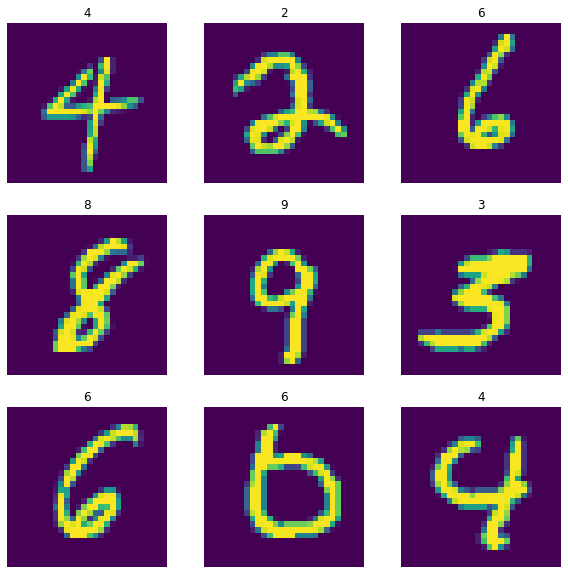

In [53]:
import matplotlib.pyplot as plt
import random
np.random.seed(143)
arr = list(np.random.randint(0,6000,9))
plt.figure(figsize=(10,10))
for i in arr:
  ax = plt.subplot(3, 3, arr.index(i)+1)
  plt.imshow(X_train[i])
  plt.title(y_train[i])
  plt.axis("off")



In [54]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_test.shape, X_train.shape)

(10000, 28, 28, 1) (60000, 28, 28, 1)


In [55]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [56]:
model = keras.Sequential(
    [
     keras.Input(shape=input_shape),
     layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
     layers.MaxPooling2D(pool_size=(2 ,2)),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(num_classes, activation='softmax'),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [57]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 3s 6ms/step - loss: 0.3614 - accuracy: 0.8904 - val_loss: 0.0856 - val_accuracy: 0.9773
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1087 - accuracy: 0.9664 - val_loss: 0.0582 - val_accuracy: 0.9838
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0814 - accuracy: 0.9752 - val_loss: 0.0471 - val_accuracy: 0.9865
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0675 - accuracy: 0.9790 - val_loss: 0.0411 - val_accuracy: 0.9888
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0602 - accuracy: 0.9816 - val_loss: 0.0379 - val_accuracy: 0.9900
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0537 - accuracy: 0.9831 - val_loss: 0.0377 - val_accuracy: 0.9890
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0491 - accuracy: 0.9847 - val_loss: 0.0362 - val_accuracy: 0.9887
Epoch 

In [58]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

[0.025049181655049324, 0.9919999837875366]


In [59]:
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025049181655049324
Test accuracy: 0.9919999837875366
